In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import statsmodels.api as sm
import scipy
import scipy.stats
import time

from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale, StandardScaler
from sklearn.preprocessing import StandardScaler

plt.rcParams['figure.figsize'] = (10,7)

%matplotlib inline

### Решение в матричной форме

In [3]:
class OrdinaryLeastSquares:
    
    def __init__(self):
        pass
    
    def fit(self, X, y):
        """Находим веса линейной регрессии аналитическим методом.

        Parameters:
        X (numpy.ndarray): Матрица признаков.
        y (numpy.ndarray): Вектор целевых значений.

        Returns:
        None
        """
        self.weights = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
        
    def predict(self, X):
        """С помощью найденных весов делаем предсказание.

        Parameters:
        X (numpy.ndarray): Матрица признаков для предсказания.

        Returns:
        numpy.ndarray: Предсказанные значения.
        """
        return np.dot(X, self.weights)

Веса функции:
 [[2.92167352]
 [1.90782425]
 [0.49972578]]


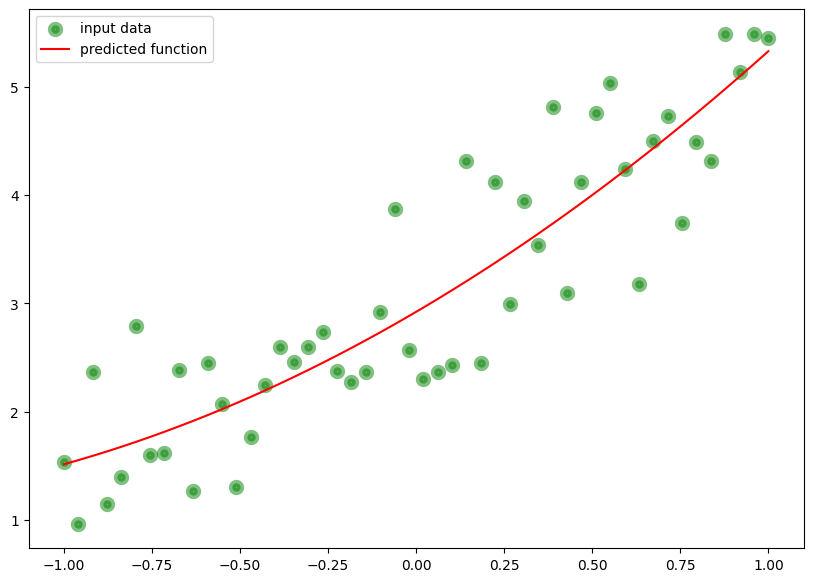

In [4]:
#определяем нашу независимую переменную
X = np.linspace(-1,1, 50)
#и зависимую переменную
y_array = np.array([2 * (x + np.random.normal(0,0.25)) + 3 for x in X]).reshape(-1,1)
#формуруем матрицу признаков(design matrix) для обучения - не забываем добавить вектор 1, коэфициент при котором будет соответсвовать смещению
x_array = np.array([X**0, X**1, X**2]).T

#обучение модели
ols = OrdinaryLeastSquares()
ols.fit(x_array, y_array)

predictions = ols.predict(x_array)
print('Веса функции:\n', ols.weights)

#визуализация предсказания и исходных данных
plt.scatter(X, y_array, label='input data', c = 'g',linewidths=5, alpha=0.5)
plt.plot(X, predictions, color='r',label='predicted function')
plt.legend()
plt.show()

### Решение итеративным способом аппроксимации квадратичной функции линейной регрессией

y_array:  (50, 1)
Weights:
 [[ 4.99730364]
 [-0.01098276]
 [ 1.00139723]]
Number of iters:  11234


Text(0.5, 1.0, 'График ошибки')

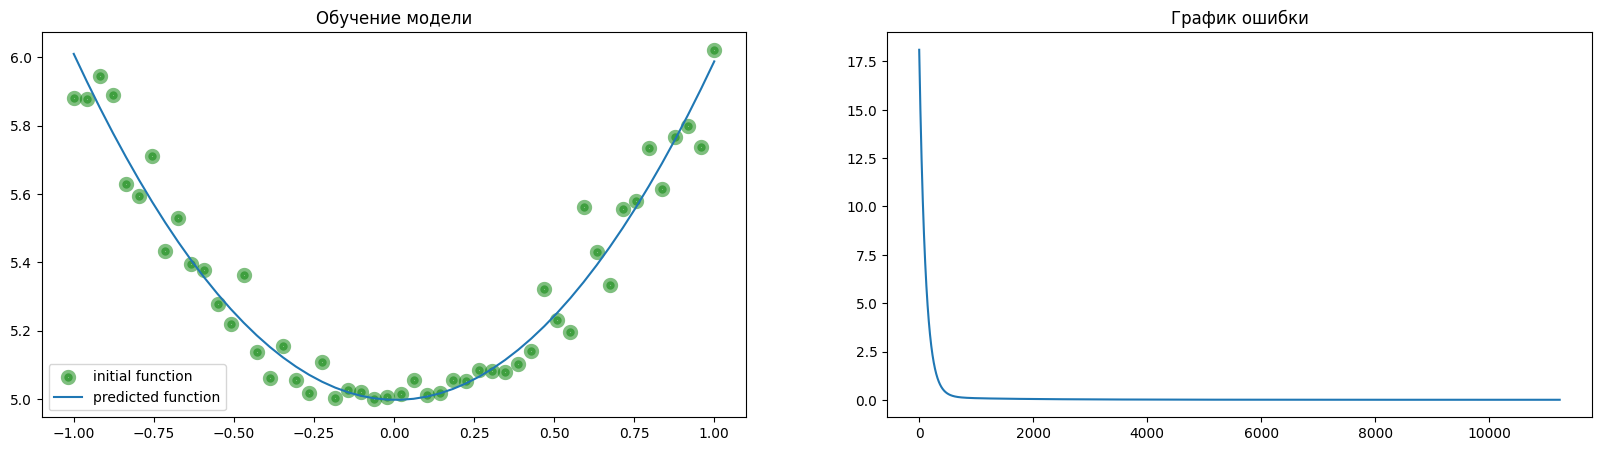

In [6]:
class IterativeLinearRegression:
    
    def __init__(self, learning_rate, iters):
        """
        Конструктор класса для итеративной линейной регрессии.

        Parameters:
        learning_rate (float): Скорость обучения (шаг градиентного спуска).
        iters (int): Максимальное количество итераций для обучения.

        Attributes:
        iters (int): Количество итераций.
        learning_rate (float): Скорость обучения.
        tol (float): Порог сходимости для разницы нормы весов между итерациями.
        weights (numpy.ndarray): Веса модели после обучения.
        """
        self.iters = iters
        self.learning_rate = learning_rate
        self.tol = 1e-5

    def fit_with_while(self, X, y):
        """
        Обучение линейной регрессии численным методом с использованием итераций до сходимости.

        Parameters:
        X (numpy.ndarray): Матрица признаков.
        y (numpy.ndarray): Вектор целевых значений.

        Returns:
        list: Список значений функции потерь на каждой итерации.
        """
        loss_list = []
        weights_list = []
        
        self.weights = np.random.rand(X.shape[1], 1)
        weights_list.append(self.weights)

        loss_grad = self.loss_grad(X, y)
        step = self.learning_rate * loss_grad / len(X)
        self.weights = self.weights - step
        weights_list.append(self.weights)

        i = 1
        while np.linalg.norm(weights_list[i] - weights_list[i - 1]) > self.tol:
            loss_grad = self.loss_grad(X, y)
            step = self.learning_rate * loss_grad / len(X)
            self.weights = self.weights - step
            loss = self.loss(X, y)
            loss_list.append(loss)
            weights_list.append(self.weights)
            i += 1
        return loss_list

    def fit(self, X, y):
        """
        Обучение линейной регрессии численным методом с использованием указанного количества итераций.

        Parameters:
        X (numpy.ndarray): Матрица признаков.
        y (numpy.ndarray): Вектор целевых значений.

        Returns:
        list: Список значений функции потерь на каждой итерации.
        """
        loss_list = []
        weights_list = []
        self.weights = np.random.rand(X.shape[1], 1)
        
        for _ in range(self.iters):
            loss_grad = self.loss_grad(X, y)
            step = self.learning_rate * loss_grad / len(X)
            self.weights = self.weights - step
            loss = self.loss(X, y)
            loss_list.append(loss)
        return loss_list
    
    def predict(self, X):
        """
        Выполнение предсказаний с использованием обученных весов.

        Parameters:
        X (numpy.ndarray): Матрица признаков для предсказания.

        Returns:
        numpy.ndarray: Предсказанные значения.
        """
        return np.dot(X, self.weights)

    def loss(self, X, y):
        """
        Вычисление среднеквадратичной ошибки.

        Parameters:
        X (numpy.ndarray): Матрица признаков.
        y (numpy.ndarray): Вектор целевых значений.

        Returns:
        float: Среднеквадратичная ошибка.
        """
        y_hat = np.dot(X, self.weights)
        loss = 1 / len(X) * np.sum((y_hat - y) ** 2)
        return loss
    
    def loss_grad(self, X, y):
        """
        Вычисление градиента среднеквадратичной ошибки.

        Parameters:
        X (numpy.ndarray): Матрица признаков.
        y (numpy.ndarray): Вектор целевых значений.

        Returns:
        numpy.ndarray: Градиент среднеквадратичной ошибки.
        """
        y_hat = np.dot(X, self.weights)
        loss_gradient = 2 / len(X) * np.dot(X.T, (y_hat - y))
        return loss_gradient
    

X = np.linspace(-1,1,50)

y_array = np.array([(x + np.random.normal(0,0.08))**2 + 5 for x in X]).reshape(-1,1)

print('y_array: ', y_array.shape)

x_array = np.array([X**0, X**1, X**2]).T

ilr = IterativeLinearRegression(learning_rate=0.1, iters=1000)
train_history = ilr.fit_with_while(x_array, y_array)
print('Weights:\n', ilr.weights)
print('Number of iters: ', len(train_history))

predictions = ilr.predict(x_array)

# визуализация предсказания и процесса обучения
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

ax1.scatter(X, y_array, label='initial function', c = 'g',linewidths=5, alpha=0.5)
ax1.plot(X, predictions, label='predicted function')

ax1.set_title('Обучение модели')
ax1.legend()

ax2.plot(np.arange(len(train_history)), train_history)
ax2.set_title('График ошибки')

### Работа с датасетом

In [7]:
# чтение данных с поомощью pandas
df = pd.read_csv('bike.csv')
# определение признаков для работы
feature_names = ['holiday', 'humidity', 'summer', 'temp', 'windspeed', 'workingday']
# нормализация признаков
scaled_df = df[feature_names].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
scaled_df['count'] = df['count'].tolist()
scaled_df.head()

,holiday,humidity,summer,temp,windspeed,workingday,count
0,-0.156786,0.987606,-0.914784,-0.925973,0.926255,0.68378,2
1,-0.156786,-0.307982,1.092789,-0.043565,0.353309,0.68378,157
2,-0.156786,-0.979769,1.092789,2.309524,0.124745,0.68378,233
3,-0.156786,1.323500,1.092789,0.446662,0.582641,0.68378,98
4,-0.156786,0.651713,-0.914784,-1.416200,-0.905330,0.68378,6


### Оценка признаков

In [8]:
from scipy.stats import ncf, f


def calculate_significance(y_true, y_preds, coefs_num):
    """
    Рассчитывает статистики и коэффициент детерминации для оценки значимости регрессионной модели.

    Parameters:
    y_true (numpy.ndarray): Наблюдаемые значения (реальные значения).
    y_preds (numpy.ndarray): Предсказанные значения регрессионной модели.
    coefs_num (int): Количество коэффициентов (параметров) в модели.

    Returns:
    dict: Словарь с вычисленными статистиками, включая p-значение (p-value), F-статистику, коэффициент детерминации (r_squared) и скорректированный коэффициент детерминации (adj_r_squared).
    """
    # Увеличиваем количество коэффициентов на 1, чтобы учесть смещение (bias).
    coefs_num += 1
    
    # Вычисляем сумму квадратов отклонений между реальными и предсказанными значениями.
    ss_reg = ((y_true - y_preds) ** 2).sum(axis=0)
    
    # Вычисляем сумму квадратов отклонений между реальными значениями и их средним значением.
    ss_mean = ((y_true - np.average(y_true, axis=0)) ** 2).sum(axis=0)
    
    # Вычисляем коэффициент детерминации (R^2).
    r_squared = (ss_mean - ss_reg) / ss_mean
    
    # Вычисляем скорректированный коэффициент детерминации (adjusted R^2).
    adj_r_squared = 1 - (len(y_true) - 1) / (len(y_true) - coefs_num - 1) * (1 - r_squared)
    
    # Вычисляем степени свободы для F-статистики.
    df1 = (coefs_num - 1)
    df2 = (len(y_true) - coefs_num)

    # Вычисляем числитель и знаменатель для F-статистики.
    numerator = r_squared / df1
    denominator = (1 - r_squared) / df2
    
    # Вычисляем значение F-статистики.
    F = numerator / denominator

    # Вычисляем p-значение (area to the right in pdf) для F-статистики.
    p_value = 1 - f.cdf(F, df1, df2)

    # Возвращаем результаты в виде словаря.
    return {'p-value': p_value, 'F stat': F, 'r_squared': r_squared, 'adj_r_squared': adj_r_squared}

In [9]:
# формирование данных для обучения
bias_term = np.ones((len(scaled_df), 1))#добавляем признак из 1 - вектор смещения
x_array = np.concatenate([bias_term, np.array(scaled_df[feature_names])], axis=1)
y_array = np.array(scaled_df['count']).reshape(-1,1)

Number of iters:  129831


{'p-value': array([1.11022302e-16]),
 'F stat': array([270.26752786]),
 'r_squared': array([0.35140713]),
 'adj_r_squared': array([0.3498897])}

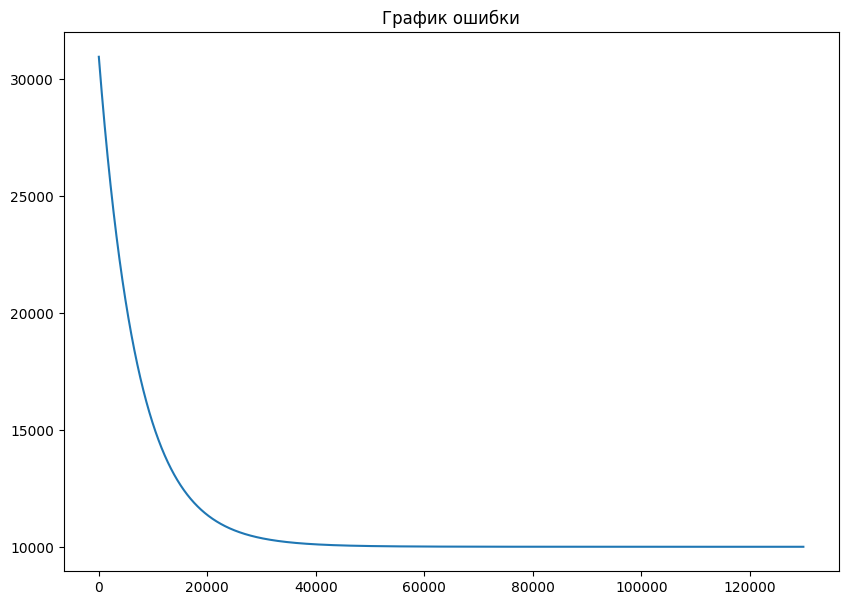

In [10]:
ilr = IterativeLinearRegression(learning_rate=0.1, iters=100000)
train_history = ilr.fit_with_while(x_array, y_array)
predictions = ilr.predict(x_array)

print('Number of iters: ', len(train_history))

#визуализация процесса обучения
plt.plot(np.arange(len(train_history)), train_history)
plt.title('График ошибки')

calculate_significance(y_array, predictions, x_array.shape[1] - 1)

In [11]:
#подобранные веса
print('ILR weights:\n', ilr.weights)

ILR weights:
 [[125.59128858]
 [  3.19530577]
 [-28.81665703]
 [ 11.49902112]
 [ 61.19563966]
 [  2.93492464]
 [ -0.23564143]]


In [12]:
ols = OrdinaryLeastSquares()
ols.fit(x_array, y_array)
ols_predictions = ols.predict(x_array)

calculate_significance(y_array, ols_predictions, x_array.shape[1] - 1)

{'p-value': array([1.11022302e-16]),
 'F stat': array([270.27116414]),
 'r_squared': array([0.3514102]),
 'adj_r_squared': array([0.34989278])}

In [13]:
print('OLS weights:\n', ols.weights)

OLS weights:
 [[125.613     ]
 [  3.18559433]
 [-28.70572394]
 [ 11.28355533]
 [ 61.39632906]
 [  2.96481203]
 [ -0.21574707]]


### Исследование мультиколлинеарности

In [14]:
import random

def feature_generator(curr_df, feature_list):
    """
    Генерируем случайный линейно зависимый признак из нашего датафрейма
    """
    random_coll = random.sample(feature_list, 2)
    new_feature = random.choice([
        curr_df[random_coll[0]] + curr_df[random_coll[1]],
        2 * curr_df[random_coll[0]],
        curr_df[random_coll[0]] - curr_df[random_coll[1]],
        2 * curr_df[random_coll[0]] + curr_df[random_coll[1]]
    ])
    return new_feature

Суть эксперимента - проверить OLS модель при обучении с линейно-зависимыми признаками. 
Для этого на протяжении 10 экспериментов генерируем с помощью функции **feature_generator** линейно зависимый признак от исходных признаков и добавляем ее в наш датафрейм. Далее обучаем модель и смотрим на норму весов и ошибку модели. Мы ожидаем увидеть сильную флуктуацию в весах модели и в ошибке на тестовой выборке. Это покажет нам неустойчивость OLS модели к мультиколлинеарности.

In [15]:
from numpy import linalg
from tqdm import tqdm
from copy import deepcopy

original_features = ['holiday', 'humidity', 'summer', 'temp', 'windspeed', 'workingday']
train_features = ['holiday', 'humidity', 'summer', 'temp', 'windspeed', 'workingday']

scaled_df_copy = deepcopy(scaled_df)

total_experiements = 10

weights_norm_list = []
error_list = []
r_squared_list = []
iters_amount_list = []


for i in tqdm(range(total_experiements)):
    if i >= 1:
        feature_name = f'new_feature_{i}'
        scaled_df_copy[feature_name] = feature_generator(scaled_df_copy, original_features)
        train_features.append(feature_name)
    print(train_features)

    # делим нашу выборку на обучающую и тестовую
    X_train, X_test, y_train, y_test = train_test_split(scaled_df_copy[train_features], scaled_df_copy['count'], random_state=42)

    # подготавливаем обучающую выборку
    bias_term = np.ones((len(X_train), 1))
    x_train = np.concatenate([bias_term, X_train], axis=1)
    y_train = np.array(y_train).reshape(-1,1)
    
    # подготавливаем тествую выборку
    bias_term = np.ones((len(X_test), 1))
    x_test = np.concatenate([bias_term, X_test], axis=1)
    y_test = np.array(y_test).reshape(-1,1)

    # ilr = IterativeLinearRegression(learning_rate=0.1, iters=100000)
    # train_history = ilr.fit_with_while(x_train, y_train)
    # predictions = ilr.predict(x_test)
    
    # обучаем аналитическим методом линейную регрессию
    ols = OrdinaryLeastSquares()
    ols.fit(x_train, y_train)
    predictions = ols.predict(x_test)

    # рассчитываем среднее весов
    weights_sum = np.mean(np.abs(ols.weights))
    # рассчитываем ошибку модели на тестовой выборке
    mse_error = 1/len(x_test) * np.sum((predictions - y_test)**2)
    print(calculate_significance(y_test, predictions, x_test.shape[1] - 1))
    r_squared = calculate_significance(y_test, predictions, x_test.shape[1] - 1)['adj_r_squared']

    r_squared_list.append(r_squared)
    weights_norm_list.append(weights_sum)
    error_list.append(mse_error)
    iters_amount_list.append(len(train_history))
    
    print()

 10%|████▍                                       | 1/10 [00:00<00:00, 70.08it/s]


['holiday', 'humidity', 'summer', 'temp', 'windspeed', 'workingday']
{'p-value': array([1.11022302e-16]), 'F stat': array([61.12710197]), 'r_squared': array([0.33048745]), 'adj_r_squared': array([0.32417129])}

['holiday', 'humidity', 'summer', 'temp', 'windspeed', 'workingday', 'new_feature_1']


LinAlgError: Singular matrix

Мы видим, что ошибка и веса действительно начинают флуктуировать. А коэфициент детерминации явно показывает сильное переобучение модели.

ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

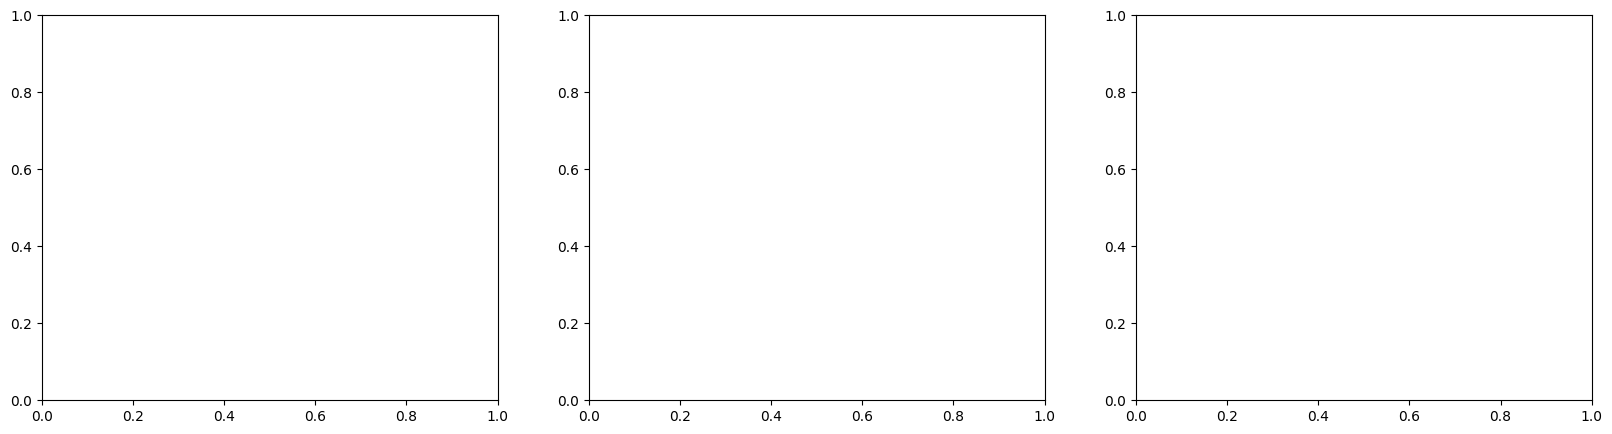

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

ax1.plot(list(range(total_experiements)), weights_norm_list)
ax1.set_title('Ошибка на тесте')

ax2.plot(list(range(total_experiements)), error_list)
ax2.set_title('Размер весов')

ax3.plot(list(range(total_experiements)), r_squared_list)
ax3.set_title('$R^2$')

### Интерпретируемое машинное обучение

На практике, линейную регрессию сам никто не пишет - используют готовые библиотеки. Так как ключевое свойство линейных моделей - интерпретируемость и возможность оценивать наш уровень доверия к таким моделям, нам необходимо множество статистик и метрик, которые позволят нам достаточно точно оценить качесвто нашей модели. Ключевой библиотекой с реализованными линейными моделями является **statmodels**.

In [17]:
#формирование данных для модели
x_array = scaled_df[feature_names]
#добавление вектора смещения
x_array = sm.add_constant(x_array)
y_array = scaled_df['count']

#обучение модели, hasconst - то что мы добавили вектор смещения в модель
ols_model = sm.OLS(y_array, x_array, hasconst=True)
results = ols_model.fit()

#описание интерпретации таблички 
#https://www.geeksforgeeks.org/interpreting-the-results-of-linear-regression-using-ols-summary/
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     270.3
Date:                Sat, 14 Oct 2023   Prob (F-statistic):          5.70e-277
Time:                        21:46:35   Log-Likelihood:                -18074.
No. Observations:                3000   AIC:                         3.616e+04
Df Residuals:                    2993   BIC:                         3.620e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        125.6130      1.829     68.680      0.000     122.027     129.199
holiday        3.1856      1.883      1.692      0.091      -0.506       6.878
humidity     -28.7057      1.989    -14.430      0.000     -32.606     -24.805
summer        11.2836      2.128      5.302      0.000       7.111      15.456
temp          61.3963      2.082     29.493      0.000      57.315      65.478
windspeed      2.9648      1.910      1.552      0.121      -0.780       6.709
workingday    -0.2157      1.890     -0.114      0.909      -3.922       3.490
==============================================================================
Omnibus:                      378.392   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              592.267
Skew:                           0.886   Prob(JB):                    2.46e-129
Kurtosis:                       4.264   Cond. No.                         1.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Практикум

In [18]:
!wget https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_train.csv
!wget https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_test.csv

--2023-10-14 21:46:38--  https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_train.csv
Распознаётся raw.githubusercontent.com (raw.githubusercontent.com)… 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Подключение к raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 460676 (450K) [text/plain]
Сохранение в: ‘house_prices_train.csv’

house_prices_train. 100%[===================>] 449,88K  --.-KB/s    за 0,1s    

2023-10-14 21:46:39 (3,32 MB/s) - ‘house_prices_train.csv’ сохранён [460676/460676]

--2023-10-14 21:46:39--  https://raw.githubusercontent.com/Data-Science-FMI/ml-from-scratch-2019/master/data/house_prices_test.csv
Распознаётся raw.githubusercontent.com (raw.githubusercontent.com)… 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Подключение к raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443

In [19]:
df = pd.read_csv('house_prices_train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [20]:
num_features = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 
                'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 
                '1stFlrSF','2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 
                'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 
                'GarageCars', 'GarageArea', 'WoodDeckSF','OpenPorchSF', 
                'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 
                'MiscVal', 'MoSold', 'YrSold']

target_feature = 'SalePrice'

In [21]:
df_num = df[num_features + [target_feature]]

In [22]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   1stFlrSF       1460 non-null   int64  
 9   2ndFlrSF       1460 non-null   int64  
 10  LowQualFinSF   1460 non-null   int64  
 11  GrLivArea      1460 non-null   int64  
 12  BsmtFullBath   1460 non-null   int64  
 13  BsmtHalfBath   1460 non-null   int64  
 14  FullBath       1460 non-null   int64  
 15  HalfBath       1460 non-null   int64  
 16  BedroomAbvGr   1460 non-null   int64  
 17  KitchenAbvGr   1460 non-null   int64  
 18  TotRmsAb

### Сделайте стандартизацию/заполните пустые значения/исследуйте на выбросы данные признаков обучающей и тестовой выборки(3 балл)

In [23]:
from ydata_profiling import ProfileReport

In [24]:
profile = ProfileReport(df_num, title='EDA Report')
profile.to_file('eda_report.html')

/home/jaskier/DSProjects/Analysis/math-foundations-of-ml/.venv/lib/python3.9/site-packages/ydata_profiling/utils/dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 1 Заполнение пустых значений

In [25]:
df_num.loc[:, df_num.isna().sum() > 0].isna().sum()

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

- LotFrontage - по хорошему надо сгруппировать в группы, описывающие районы, и заполнить медианами соответствующих групп или использовать knn imputer. Но пока обойдемся простым заполнением по медиане. Также стоит добавить индикатор пропуска;
- MasVnrArea - всего 8 пропусков, поэтому можно удалить эти строки;
- GarageYrBlt - скорее всего пропуск означает отсутствие гаража. Можно подставить в пропущенные значения год постройки дома и определенно добавить индикатор пропуска;

In [26]:
def impute(df):
    X = df.copy()
    X['LotFrontage_miss'] = df['LotFrontage'].isna().astype(int)
    X['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
    
    X['GarageYrBlt_miss'] = df['GarageYrBlt'].isna().astype(int)
    X.loc[df['GarageYrBlt'].isna(), 'GarageYrBlt'] = df['YearBuilt']
    
    X = X.dropna(subset='MasVnrArea').reset_index(drop=True)
    
    return X

In [27]:
df_num = impute(df_num)

In [28]:
df_num.isna().sum().sum()

0

### 2 Исследование выбросов

In [29]:
import seaborn as sns

Для начала посмотрим на распределения переменных в отчете и выведем графики box-plots для переменных, где могут быть выбросы.

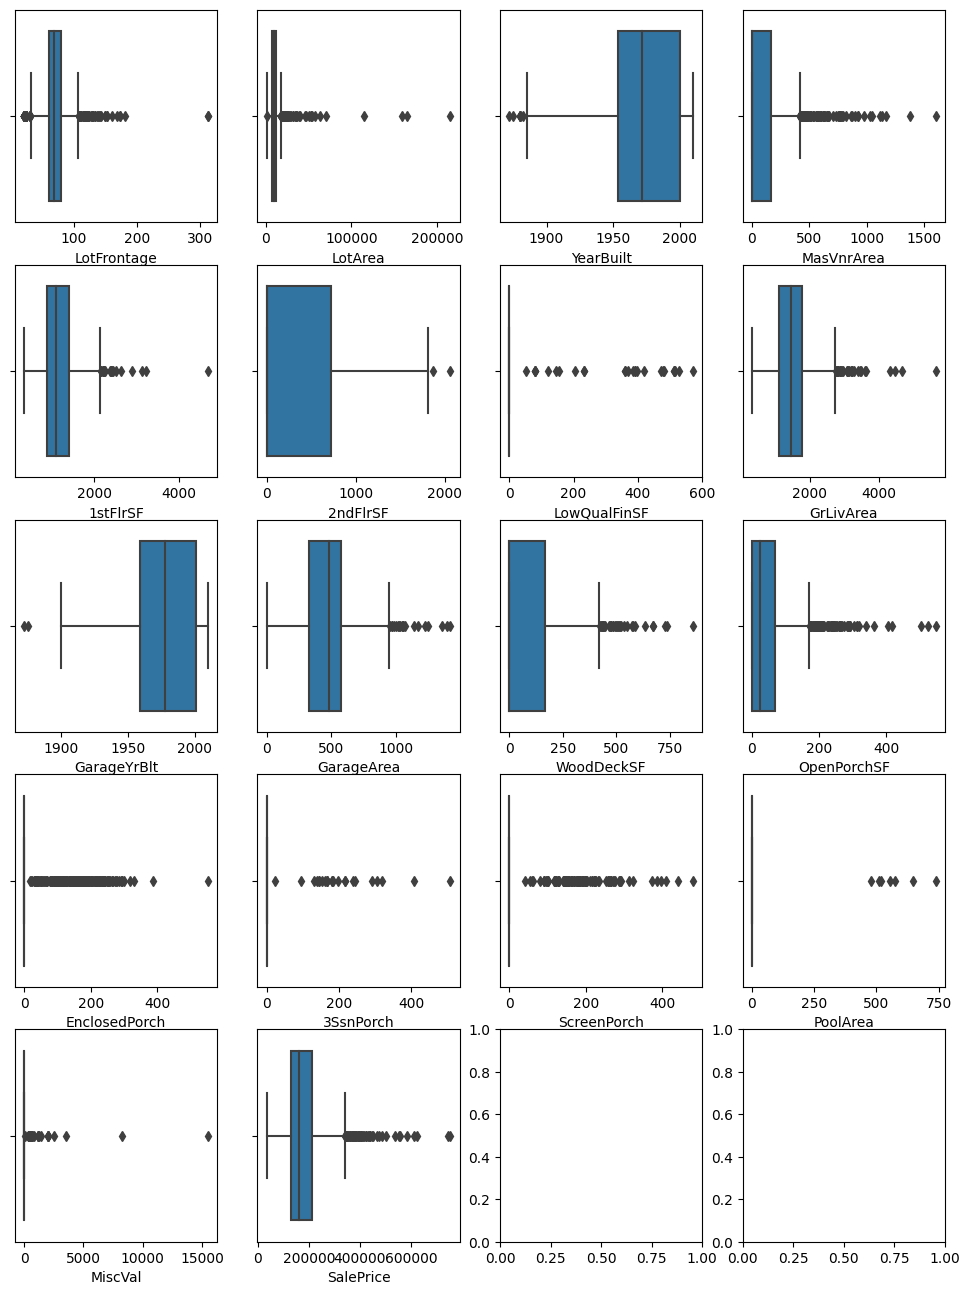

In [30]:
f, axes = plt.subplots(5, 4)
f.set_figheight(16)
f.set_figwidth(12)

sns.boxplot(data=df_num, x='LotFrontage', ax=axes[0, 0])
sns.boxplot(data=df_num, x='LotArea', ax=axes[0, 1])
sns.boxplot(data=df_num, x='YearBuilt', ax=axes[0, 2])
sns.boxplot(data=df_num, x='MasVnrArea', ax=axes[0, 3])

sns.boxplot(data=df_num, x='1stFlrSF', ax=axes[1, 0])
sns.boxplot(data=df_num, x='2ndFlrSF', ax=axes[1, 1])
sns.boxplot(data=df_num, x='LowQualFinSF', ax=axes[1, 2])
sns.boxplot(data=df_num, x='GrLivArea', ax=axes[1, 3])

sns.boxplot(data=df_num, x='GarageYrBlt', ax=axes[2, 0])
sns.boxplot(data=df_num, x='GarageArea', ax=axes[2, 1])
sns.boxplot(data=df_num, x='WoodDeckSF', ax=axes[2, 2])
sns.boxplot(data=df_num, x='OpenPorchSF', ax=axes[2, 3])

sns.boxplot(data=df_num, x='EnclosedPorch', ax=axes[3, 0])
sns.boxplot(data=df_num, x='3SsnPorch', ax=axes[3, 1])
sns.boxplot(data=df_num, x='ScreenPorch', ax=axes[3, 2])
sns.boxplot(data=df_num, x='PoolArea', ax=axes[3, 3])

sns.boxplot(data=df_num, x='MiscVal', ax=axes[4, 0])
sns.boxplot(data=df_num, x='SalePrice', ax=axes[4, 1])

plt.show()

Конечно в ненормальных распределениях трудно сказать, где на самом деле выброс, но благодаря графикам можно выделить примерные верхние и нижние границы

По хорошему стоило в самом начале посмотреть на отчет и очистить данные с большим процентом нулей (ydata-profiling выдает предупреждения о высоком количестве нулей). Давайте проведем небольшую очистку и выделим границы выбросов в некоторых переменных

In [31]:
zeros_features = ['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

In [32]:
def clean(df, zeros_features):
    X = df.copy()
    X = df.drop(columns=zeros_features)
    return X

In [33]:
df_num = clean(df_num, zeros_features)

In [34]:
feature_outlier_thresholds = {
    'LotFrontage': {'up': 200},
    'LotArea': {'up': 80000},
    'MasVnrArea': {'up': 1300},
    '1stFlrSF': {'up': 3500},
    'GrLivArea': {'up': 4000},
    'GarageArea': {'up': 1400},
    'WoodDeckSF': {'up': 800},
    'OpenPorchSF': {'up': 430},
}

Отдельно нужно разобраться с целевой переменной - ценой продажи, там есть несколько слишком дорогих домов (целых 2). Строки с этими домами можно удалить.

Для остальных переменных проведем виндоризацию

In [35]:
def drop_outliers(df, feature_outlier_thresholds, target_outlier_threshold):
    
    def windorization(df, feature_outlier_thresholds):
        X = df.copy()

        for feature, thresholds in feature_outlier_thresholds.items():
            if 'up' in thresholds.keys():
                X.loc[X[feature] > thresholds['up'], feature] = thresholds['up']
            if 'low' in thresholds.keys():
                X.loc[X[feature] < thresholds['low'], feature] = thresholds['low']

        return X
    
    X = df.copy()
    X = windorization(X, feature_outlier_thresholds)
    X = X.drop(df[df['SalePrice'] > target_outlier_threshold].index).reset_index(drop=True)
    
    return X

In [36]:
df_num = drop_outliers(df_num, feature_outlier_thresholds, 700000)

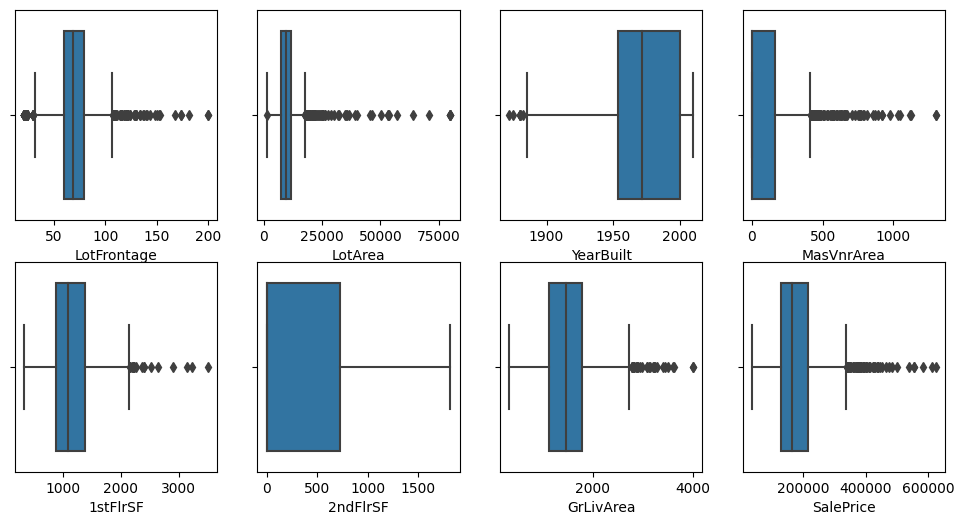

In [37]:
f, axes = plt.subplots(2, 4)
f.set_figheight(6)
f.set_figwidth(12)

sns.boxplot(data=df_num, x='LotFrontage', ax=axes[0, 0])
sns.boxplot(data=df_num, x='LotArea', ax=axes[0, 1])
sns.boxplot(data=df_num, x='YearBuilt', ax=axes[0, 2])
sns.boxplot(data=df_num, x='MasVnrArea', ax=axes[0, 3])

sns.boxplot(data=df_num, x='1stFlrSF', ax=axes[1, 0])
sns.boxplot(data=df_num, x='2ndFlrSF', ax=axes[1, 1])
sns.boxplot(data=df_num, x='GrLivArea', ax=axes[1, 2])
sns.boxplot(data=df_num, x='SalePrice', ax=axes[1, 3])

plt.show()

Выбросы теперь менее значимы.

### 3 Стандартизация

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    df_num.drop(columns=target_feature), 
    df_num[target_feature], 
    test_size=0.2,
    random_state=42,
)
X_train.shape, X_test.shape

((1160, 28), (290, 28))

In [39]:
train_scaler = StandardScaler()
test_scaler = StandardScaler()

In [40]:
X_train = pd.DataFrame(train_scaler.fit_transform(X_train))
X_train.columns = train_scaler.get_feature_names_out()

X_test = pd.DataFrame(test_scaler.fit_transform(X_test))
X_test.columns = test_scaler.get_feature_names_out()

### Воспользоваться методом OLS библиотеки statsmodels для рассчета коэфициентов линейной регрессии (1 балл)

In [41]:
ols_model = sm.OLS(list(y_train), sm.add_constant(X_train), hasconst=True)
results = ols_model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     190.0
Date:                Sat, 14 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:50:46   Log-Likelihood:                -13704.
No. Observations:                1160   AIC:                         2.747e+04
Df Residuals:                    1131   BIC:                         2.761e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.808e+05    971.795    186.002      0.000    1.79e+05    1.83e+05
MSSubClass       -6495.2086   1271.086     -5.110      0.000   -8989.160   -4001.257
LotFrontage       -738.6644   1217.113     -0.607      0.544   -3126.717    1649.388
LotArea           5535.1378   1181.723      4.684      0.000    3216.522    7853.754
OverallQual       2.295e+04   1704.058     13.470      0.000    1.96e+04    2.63e+04
OverallCond       5891.6776   1225.089      4.809      0.000    3487.975    8295.380
YearBuilt         1.354e+04   2387.681      5.670      0.000    8853.001    1.82e+04
YearRemodAdd      3259.2646   1493.052      2.183      0.029     329.801    6188.729
MasVnrArea        6251.3264   1138.812      5.489      0.000    4016.905    8485.748
1stFlrSF         -3.646e+04   7263.095     -5.020      0.000   -5.07e+04   -2.22e+04
2ndFlrSF         -4.741e+04   8297.002     -5.714      0.000   -6.37e+04   -3.11e+04
GrLivArea         7.909e+04   9886.034      8.000      0.000    5.97e+04    9.85e+04
BsmtFullBath      7162.2115   1108.716      6.460      0.000    4986.840    9337.582
BsmtHalfBath       217.8235   1009.114      0.216      0.829   -1762.122    2197.769
FullBath           718.5336   1654.294      0.434      0.664   -2527.297    3964.364
HalfBath         -1486.8192   1452.979     -1.023      0.306   -4337.656    1364.017
BedroomAbvGr     -9333.7063   1486.651     -6.278      0.000   -1.23e+04   -6416.803
KitchenAbvGr     -4214.9557   1218.954     -3.458      0.001   -6606.621   -1823.290
TotRmsAbvGrd      9192.8000   2203.359      4.172      0.000    4869.670    1.35e+04
Fireplaces        3579.4625   1228.353      2.914      0.004    1169.356    5989.569
GarageYrBlt      -1900.8669   2165.430     -0.878      0.380   -6149.579    2347.845
GarageCars        1.114e+04   2369.772      4.700      0.000    6489.116    1.58e+04
GarageArea         363.6846   2339.548      0.155      0.876   -4226.659    4954.028
WoodDeckSF        2216.2187   1065.678      2.080      0.038     125.291    4307.146
OpenPorchSF        130.9752   1078.867      0.121      0.903   -1985.831    2247.781
MoSold             -99.8553    998.109     -0.100      0.920   -2058.209    1858.498
YrSold            -213.8655   1001.465     -0.214      0.831   -2178.803    1751.072
LotFrontage_miss -1986.4501   1009.325     -1.968      0.049   -3966.811      -6.090
GarageYrBlt_miss  5396.6673   1279.501      4.218      0.000    2886.205    7907.129
==============================================================================
Omnibus:                      280.837   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14249.006
Skew:                          -0.024   Prob(JB):                         0.00
Kurtosis:                      20.170   Cond. N

### Выберите переменные, которые статистически положительно связаны с ценой на дом. (1 балл) 

- MSSubClass
- LotArea
- OverallQual
- OverallCond
- YearBuilt
- YearRemodAdd
- MasVnrArea
- 1stFlrSF
- 2ndFlrSF
- GrLivArea
- BsmtFullBath
- BedroomAbvGr
- KitchenAbvGr
- TotRmsAbvGrd
- Fireplaces
- GarageCars
- WoodDeckSF
- LotFrontage_miss
- GarageYrBlt_miss

### Оцените модель на тестовом сете - метрики $R^2$ и RMSE. Что мы можем сказать по ошибке? (1 балл)

In [42]:
from sklearn.metrics import r2_score, mean_squared_error

In [43]:
print(f'R^2: {r2_score(list(y_test), results.predict(sm.add_constant(X_test))):.4}')

R^2: 0.8379


In [44]:
print(f'RMSE: {mean_squared_error(list(y_test), results.predict(sm.add_constant(X_test)))**(1/2):.8}')

RMSE: 27971.748


В целом модель работает довольно хорошо.

r2 на train почти равна r2 на test: переобучения нет.

RMSE однако довольно высокая. Ошибаться в среднем на 28000, когда средняя цена равна 173000 довольно дорого для бизнеса. Поэтому следует и дальше улучшать модель, но baseline-модель, имеющая только количественные признаки, получилась неплохой.

### Придумайте какой-нибудь хороший новый признак. Смогли ли вы снизить ошибку на обучении за счет него? (0.5 балла)

In [45]:
df_num = df[num_features + [target_feature]]

In [46]:
df_num['LivLotRation'] = df_num['GrLivArea'] / df_num['LotArea']
df_num['Spaciousness'] = (df_num['1stFlrSF'] + df_num['2ndFlrSF']) / df_num['TotRmsAbvGrd']

/tmp/ipykernel_77159/3384421356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['LivLotRation'] = df_num['GrLivArea'] / df_num['LotArea']
/tmp/ipykernel_77159/3384421356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['Spaciousness'] = (df_num['1stFlrSF'] + df_num['2ndFlrSF']) / df_num['TotRmsAbvGrd']


In [47]:
df_num = impute(df_num)
df_num = clean(df_num, zeros_features)
df_num = drop_outliers(df_num, feature_outlier_thresholds, 700000)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    df_num.drop(columns=target_feature), 
    df_num[target_feature], 
    test_size=0.2,
    random_state=42,
)
X_train.shape, X_test.shape

((1160, 30), (290, 30))

In [49]:
train_scaler = StandardScaler()
test_scaler = StandardScaler()

In [50]:
X_train = pd.DataFrame(train_scaler.fit_transform(X_train))
X_train.columns = train_scaler.get_feature_names_out()

X_test = pd.DataFrame(test_scaler.fit_transform(X_test))
X_test.columns = test_scaler.get_feature_names_out()

In [51]:
ols_model = sm.OLS(list(y_train), sm.add_constant(X_train), hasconst=True)
results = ols_model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     180.9
Date:                Sat, 14 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:50:46   Log-Likelihood:                -13693.
No. Observations:                1160   AIC:                         2.745e+04
Df Residuals:                    1129   BIC:                         2.761e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.808e+05    963.969    187.512      0.000    1.79e+05    1.83e+05
MSSubClass       -3210.7597   1457.776     -2.203      0.028   -6071.014    -350.505
LotFrontage      -2498.8533   1275.012     -1.960      0.050   -5000.513       2.806
LotArea           3179.9060   1304.805      2.437      0.015     619.791    5740.021
OverallQual       2.299e+04   1699.904     13.527      0.000    1.97e+04    2.63e+04
OverallCond       5693.1637   1218.713      4.671      0.000    3301.966    8084.361
YearBuilt         1.407e+04   2371.557      5.934      0.000    9419.329    1.87e+04
YearRemodAdd      3401.8601   1482.554      2.295      0.022     492.988    6310.732
MasVnrArea        6561.8408   1144.777      5.732      0.000    4315.711    8807.970
1stFlrSF         -3.093e+04   8200.114     -3.773      0.000    -4.7e+04   -1.48e+04
2ndFlrSF         -4.188e+04   9290.376     -4.508      0.000   -6.01e+04   -2.37e+04
GrLivArea         8.332e+04   9968.148      8.358      0.000    6.38e+04    1.03e+05
BsmtFullBath      6761.6019   1104.794      6.120      0.000    4593.923    8929.281
BsmtHalfBath       169.6035   1002.332      0.169      0.866   -1797.040    2136.247
FullBath           867.3837   1641.316      0.528      0.597   -2352.990    4087.757
HalfBath         -1052.3057   1448.002     -0.727      0.468   -3893.384    1788.773
BedroomAbvGr     -9395.6237   1477.399     -6.360      0.000   -1.23e+04   -6496.867
KitchenAbvGr     -4822.0971   1251.195     -3.854      0.000   -7277.027   -2367.167
TotRmsAbvGrd      2096.6021   5916.822      0.354      0.723   -9512.602    1.37e+04
Fireplaces        3604.4089   1222.520      2.948      0.003    1205.742    6003.076
GarageYrBlt      -2069.9118   2148.700     -0.963      0.336   -6285.806    2145.983
GarageCars        1.099e+04   2351.001      4.673      0.000    6373.648    1.56e+04
GarageArea        -149.2642   2323.483     -0.064      0.949   -4708.095    4409.566
WoodDeckSF        2069.9818   1057.994      1.957      0.051      -5.873    4145.837
OpenPorchSF        -71.5482   1071.117     -0.067      0.947   -2173.152    2030.056
MoSold             -51.0733    990.690     -0.052      0.959   -1994.874    1892.727
YrSold               2.2022    994.553      0.002      0.998   -1949.178    1953.583
LivLotRation     -6686.2872   1587.801     -4.211      0.000   -9801.661   -3570.914
Spaciousness     -5117.2056   4087.316     -1.252      0.211   -1.31e+04    2902.385
LotFrontage_miss -2203.0673   1005.556     -2.191      0.029   -4176.036    -230.099
GarageYrBlt_miss  4918.8070   1278.626      3.847      0.000    2410.056    7427.558
==============================================================================
Omnibus:                      278.095   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.0

In [52]:
print(f'R^2: {r2_score(list(y_test), results.predict(sm.add_constant(X_test))):.4}')

R^2: 0.8396


In [53]:
print(f'RMSE: {mean_squared_error(list(y_test), results.predict(sm.add_constant(X_test)))**(1/2):.8}')

RMSE: 27824.168


Качество немножко улучшилось, да и признаки получились значимыми.

### В нашей модели много признаков. Возможно ли нам уменьшить количеcтво признаков, при этом сохранив качество модели? (0.5 балла)

Да, есть некоторые количественные признаки, которые имеют слишком много нулей, они уже были удалены при работе с выбросами. Также могут быть категориальные переменные, у которых слишком сильно преобладает одно значение и очень мало остальных

Для поиска других неинформативных признаков можно использовать методы feature selection или методы сокращения размерности, например PCA